# STA 130 Homework 2

### 1. Revisiting  3(a) of TUT Demo

- ChatGPT explains the premise of the Monty Hall problem.

### 2. Extending session for simple Monte Hall code

- I prefer ChatGPT's program which I find easier on the eyes due to comments spanning only 1 line. Explanations provided from ChatGPT was thus more succinct, although this is purely subjective as I understood both explanations perfectly fine.

### 3. Preferred version of problem from ChatGPT

In [6]:
# code provided from ChatGPT simulating the Monty Hall problem

import numpy as np

# Number of simulations
num_simulations = 100000

# Variables to track wins if switching vs if sticking
switch_wins = 0
stick_wins = 0

# Loop through the number of simulations using numpy for random choices
for _ in range(num_simulations):
    
    # Randomly place the car behind one of the three doors (0, 1, or 2)
    car_position = np.random.randint(0, 3)
    
    # Contestant randomly picks one of the doors (0, 1, or 2)
    initial_choice = np.random.randint(0, 3)
    
    # Monty reveals a door that the contestant didn't pick and that doesn't have the car
    possible_reveals = [door for door in range(3) if door != initial_choice and door != car_position]
    
    # Monty opens one of those doors (randomly if there's more than one option)
    monty_reveal = np.random.choice(possible_reveals)
    
    # The remaining unopened door (the door that neither the contestant picked nor Monty revealed)
    remaining_door = [door for door in range(3) if door != initial_choice and door != monty_reveal][0]
    
    # Check if switching would win
    if remaining_door == car_position:
        switch_wins += 1
    else:
        stick_wins += 1

# Output the results
switch_win_percentage = (switch_wins / num_simulations) * 100
stick_win_percentage = (stick_wins / num_simulations) * 100

print(f"Switching wins: {switch_win_percentage}%")
print(f"Sticking wins: {stick_win_percentage}%")


Switching wins: 66.405%
Sticking wins: 33.595000000000006%


#### Summary before Markov conversation

https://chatgpt.com/share/66e605ae-5c48-800f-a35f-ebf1c3020715

In our conversation, we discussed the Monty Hall problem, a probability puzzle where a contestant must choose one of three doors, with a car behind one door and goats behind the others. After selecting a door, the host, Monty Hall, reveals a goat behind one of the two remaining doors and offers the contestant a choice to switch to the other unopened door. The correct strategy is to switch doors, as this increases the probability of winning from 1/3 to 2/3.

We then explored how to simulate the Monty Hall problem using Python. I provided code that uses a for loop to simulate the scenario 10,000 times, showing that switching gives a much higher chance of winning. Finally, we adapted the code to run 100,000 simulations using NumPy, a popular library for numerical computations.

### 4. Markov Chains and ChatBots

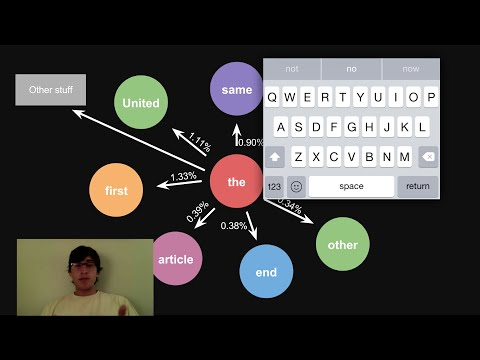

In [1]:
# Markov Chains and Text Generation
from IPython.display import YouTubeVideo
YouTubeVideo('56mGTszb_iM', width = 550)

##### My own notes on the video
- model of probability of certain words following other words in the context of text
    - useful for predictive text
    - pairs of words (and of longer length) generate stronger accuracy
        - 'the same' instead of just 'the'


I promopted ChatGPT to re-write the given code with comments embedded to gain a better understanding of how the code works.

- word_used: keeps track of how many times each word in words appears
- next_word: dictionary tracks what word follows a given word
    - each word in list has associated dictionary storing words  that appear immediately after it, along w/ frequency.
        - ex. if 'hello' is followed by 'world' twice and 'there' once
            - next_word['hello'] = {'world': 2, 'there': 1}
            
            <br>
           
- for loop: goes over every word in list except last (words[:-1])
    - since we are always looking at current word & next (word[i+1])
    - for each word, we check for existence in word_used dictionary
        - if yes: i+1
        - if no: add to dictionary w/ count of 1
    - for each word, we check the next word in the sequence
        - updating next_word dictionary to reflect frequency

In [14]:
words = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-08-11/avatar.csv"

# Initialize an empty dictionary to keep track of how many times each word is used
# This could also be a defaultdict(int) to avoid checking if a word is already in the dictionary
word_used = dict() 

# Initialize an empty dictionary to keep track of what word follows each word
# next_word[word] will itself be a dictionary, where the keys are the words that follow 'word',
# and the values are the number of times each of those words follows 'word'.
# Using defaultdict here could simplify some logic.
next_word = dict() 

# Loop through all words in the list except for the last one
# The variable 'words' should be a list of words from some input text
for i, word in enumerate(words[:-1]):
    
    # Check if the current word is already in the word_used dictionary
    if word in word_used:
        # If it is, increment its count
        word_used[word] += 1
    else:
        # If it's not, add it to the dictionary with a count of 1
        word_used[word] = 1
        # Also initialize the next_word dictionary for this word to keep track of what follows
        next_word[word] = {}

    # Now look at the word that comes next in the sequence (words[i+1])
    # Check if the next word already follows the current word in the next_word dictionary
    if words[i+1] in next_word[word]:
        # If it does, increment the count of how many times this word follows
        next_word[word][words[i+1]] += 1
    else:
        # If not, add the next word with an initial count of 1
        next_word[word][words[i+1]] = 1


#### Summary of a Markovian ChatBot Using Python

https://chatgpt.com/share/66e61472-1464-800f-bba4-a3dc83ff3328

In this session, we discussed the development of a "Markovian ChatBot" using Python. The chatbot is designed to generate sentences by modeling word transitions based on a given text. The core of the implementation revolves around two dictionaries:

word_used: Tracks how many times each word appears in the input text.
next_word: Tracks which words follow each word, along with the frequency of these transitions.
I provided detailed comments explaining each part of the original code, which iterates through a list of words to populate these dictionaries. I also suggested using Python’s defaultdict from the collections module to make the code more efficient by removing the need for explicit checks for whether a word exists in the dictionary.

Additionally, I offered guidance on how the chatbot could eventually generate text by probabilistically selecting the next word based on the next_word dictionary. This foundational structure is based on a Markov chain model, where the likelihood of a word being chosen depends on how frequently it follows the previous word in the text.

### 5. Extension of Markovian ChatBot Code

In [ ]:
#importing defaultdict as it was not included in the ex
from collections import defaultdict

In [22]:
# Markovian Chatbot Extension #1

word_used2 = defaultdict(int)
next_word2 = defaultdict(lambda: defaultdict(int))
for i,word in enumerate(words[:-2]):
    word_used2[word+' '+words[i+1]] += 1
    next_word2[word+' '+words[i+1]][words[i+2]] += 1 

ChatGPT recognized that this extension adds a higher-order Markov chain to the chatbot, considering **paris of consecutive words** rather than just single words like in our original code.

- word_used2[word + ' ' + words[i+1]:
    - tracks **how many times each pair of consecutive words appear** in the text

- next_word2[word + ' ' + words[i+2][words[i+2]]
    - tracks **what word follows each pair of consecutive words and how often**

This allows more contextually accurate sentences to be generated as they are now based on two words instead of one. Naturally, longer clusters of words stored in many different partitions would build a more accurate dictionary to generate sentences from.

In [ ]:
# Markovian Chatbot Extension #2

from collections import Counter, defaultdict
# `avatar` is a dataset, and `character` is one of it's columns
characters = Counter("\n"+ avatar.character.str.upper().str.replace(' ','.')+":")
# this code changes the type of the `character` column to `str`; then,
# makes the text uppercase, and replaces spaces with '.'

nested_dict = lambda: defaultdict(nested_dict)
word_used2C = nested_dict()
next_word2C = nested_dict()

for i,word in enumerate(words[:-2]):
    if word in characters:
        character = word
        
    if character not in word_used2C:
        word_used2C[character] = dict()
    if word+' '+words[i+1] not in word_used2C[character]:
        word_used2C[character][word+' '+words[i+1]] = 0
    word_used2C[character][word+' '+words[i+1]] += 1
    
    if character not in next_word2C:
        next_word2C[character] = dict()
    if word+' '+words[i+1] not in next_word2C[character]:
        next_word2C[character][word+' '+words[i+1]] = dict()
    if words[i+2] not in next_word2C[character][word+' '+words[i+1]]:
        next_word2C[character][word+' '+words[i+1]][words[i+2]] = 0
    next_word2C[character][word+' '+words[i+1]][words[i+2]] += 1

ChatGPT outlines a few key enhancements:
- characters variable extracts & processes character column by

    - converting it to upperspace
    - replacing spaces w/ periods (.), possibly to handle multi-word character names
    - counting occurances using *counter*, adding a new line \n at start and : at end
    
- **nested dictionaries**
    - nested_dict_lambda:defaultdict(nested_dict) creates a recursively nested dictionary, allowing for building **dictionaries within dictionaries w/o initializing the structure manually**
    - word_used2C (nested dictionary)
        - stores how often **bi-grams** (two word sequences) are used by each character
    - next_word2C (nested dictionary)
        - stores possible third word that can follow each bi-gram for a given character, along with frequency of these **tri-grams**
        
- **character specific** word sequences:
    - loop iterates over list of words (stopping at 3rd to last word) to avoid out-of-bounds access)
    - if current word is present in the characters column, it updates the character variable. allowing the model to track which character speaks a given sequence.
    - thus, chatbot now associates our sequences (bi-grams/tri-grams) with specific characters in the data set and can **generate responsses or new prompts based on the speaking patterns of each character.**

- word grouping
    - word + ' ' + words[i+1] creates bi-grams by joining the current & next word in the seq
    - for each bi-gram, the next word (words[i+2]) is tracked along with it's frequency, which creates a tri-gram
    
These new features implemented in Extension #2 of our code allows tri-gram data to be generated which mimics the style of specific characters in the data set by analyzing their bi-grams and the frequency of words which follow.

### 6. Experience with ChatBots in relation to the Monte Hall and Markovian Code

1. ChatBot was extremely quick and helpful for each of the above questions. As I mentioned in the previous homework assignment, the alternative of consulting Google would require filtering through a myriad of forum posts which vary in quality. The ChatBot understands context almost instantly following very little input from myself. 



2. Interacting with ChatBots was only frustrating during the latter half of the questions, but only due to my unfamilliarity with the material we were discussing (Markov Chains and slightly more complicated Python code).



3. ChatBots as a tool to help understand code has been excellent. As stated above, the alternative of googling and relying on forum posts of various quality pales in comparison to being able to provide exact input to the ChatBot and recieve instant feedback.

### 7. Experience with ChatBot and perception of AI-driven tools

I have been a big proponent of utilizing AI for learning not just coding and statistics, but other fields as well. In that sense, my perception of using AI-driven assistance tools for learning has not changed. I see no sense in being a luddite in a world driven by technology.

When I prompted the ChatBot about it's abilities, it saw itself as a highly versatile AI-driven tool designed to assist in a wide range of tasks, which I agree with. It also listed it's limitations of relying on context provided by the user and lack of advanced specialization.

I found no issue with it's limitations as I am comfortable in feeding the AI the proper prompts to recieve the information I seek. In the context of this class, the lack of advanced specialization is no issue either, considering the subject matter is only a first year undergraduate course.

#### Summary of code extension and perception of AI

https://chatgpt.com/share/66e61472-1464-800f-bba4-a3dc83ff3328

We extended the Markovian ChatBot code to create a higher-order Markov chain that considers pairs of consecutive words instead of single words when predicting the next word. This extension uses two consecutive words as context to make predictions, thereby allowing the chatbot to generate more contextually coherent sentences.

In the original version of the code, the chatbot predicted the next word based on just the current word. In this extended version, it predicts the next word based on a pair of words. This enhancement provides more context, leading to better predictions and smoother text generation. For example, instead of predicting the next word for "The," it now predicts the next word for "The cat."


https://chatgpt.com/share/66e8d3cd-721c-800f-9377-8a1873822b50

In this conversation, we discussed several aspects of a Markovian ChatBot, starting with the user’s code that implements a basic Markov chain model for generating text. The initial code used dictionaries to track word frequencies and transitions between words (bi-grams), building a simple model for text generation.

I provided feedback on how the original code could be streamlined using Python's defaultdict to simplify checks for existing words, and I suggested a way to extend the model to generate sentences using word probabilities based on bi-grams.

The user then introduced an extension to the chatbot code, which incorporates character-specific data using a dataset (avatar.character). The extension focuses on tracking word sequences not just by bi-grams but also tri-grams, with each character in the dataset having its own word sequence model. This allows the chatbot to generate character-specific responses, enhancing its ability to reflect the distinct speaking patterns of each character in the dataset.

Finally, I explained my capabilities as an AI assistant, particularly in the fields of statistics, programming, and statistical analysis. I highlighted how I can assist in various tasks such as generating code, helping with statistical models, and guiding users through programming challenges, while also acknowledging some limitations, especially in highly specialized areas or real-time data access.



### 8. Search Consensensus

The ChatBot described the relevance of each topic in question 1 in regards to career opportunities. Being able to adapt quickly to advancements in technology and evolving industry is cruical and sets one up for long-term success. AI, deep learning, and big data analytics were highlighted by the ChatBot for job secuirty in data science. Communication was important in the ability to articulate the importance of data and other such technical concepts to those not so tech savvy. 

Although the ChatBot states that the barriers of entry for statistics and data science are decreasing with the aid of AI, it would still be quite the hurdle to be a statistician or data science without some level of knowledge in those respective fields. In particular, the analytical knowledge to interpret resuts correctly and choose the right models for a given problem are crucial in order to perform accurately. 

When prompted about career exploration, I fed the chatbot various skills I had, along with a weakness. In return, it mentioned that I should strengthen my math skills in areas like algebra, statistics, and probability. All of which are courses I will be taking during my first year of undergrad.

I thought that the ChatBot was very helpful during out discussion. Of course, as stated in the first homework assignment, the next best alternative would be using Google to search for forum posts of various quality, or even posting myself for more specific answers. This would require a great deal of time, as people's time and attention to forums have been dwindling with the advent of social media. 

If I wanted to pursue the conversation further, I would hone in on a specific field I had serious interest in. For example, UX/UI design & development was mentioned as a potentional creer option for me. To deepen the conversation, I would ask how to use tools such as Figma, and for a brief JavaScript tutorial given my current knowledge of programming. Of course, for more in-depth knowledge, I would consult another sources for specific content such as a YouTube tutorial video.

### Question 8 summary

https://chatgpt.com/share/66e99f17-3ba8-800f-8a16-5ed264e6f82b

Given my proficiency in Linux, command line, basic Python, web development, and creative skills in design, photography, videography, and music production, there are several career paths available that align with both technical and creative disciplines. Some of the career options discussed include roles in full-stack web development, DevOps and systems engineering, UX/UI design, creative coding, and multimedia content creation.

To strengthen my career prospects, I can focus on expanding my Python and web development skills, learning advanced tools for multimedia production, and building projects that integrate both technical and artistic expertise. Additionally, enhancing my math skills in areas like linear algebra, statistics, and probability could open opportunities in data-driven fields like AI and machine learning. Developing a strong portfolio showcasing my diverse skills will also be crucial in standing out in these industries.

### 9. Revewing wiki and interacting with ChatBot for clarification

Somewhat, but I will make sure to review the wiki further so that I can distinguish between all relevant functions introduced during lecture and the current course project capability level portion of the homework assignment.